In [ ]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib
matplotlib.use('Agg')  # Ensure compatibility with non-interactive backends
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  
%matplotlib inline  

import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# For permutation importance
from sklearn.inspection import permutation_importance

# Set a style for seaborn plots
sns.set(style='whitegrid')

print('Libraries imported and setup complete.')

Libraries imported and setup complete.


In [3]:
file_path = "D:\Credit Risk Analysis\Credit Risk Benchmark Dataset.csv"
df = pd.read_csv(file_path, encoding='ascii')

# Quick look at the data structure
print('Dataset shape:', df.shape)
print('First few rows:')
print(df.head())

# Display data types
print('\nData types:')
print(df.dtypes)

Dataset shape: (16714, 11)
First few rows:
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  

Data types:
rev_util       float64
age            float64
late_30_59     float64
debt_ratio     float64
monthly_inc    float64
open_credit    float64
late_90        floa

In [4]:
df

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16709,1.000000,46.0,0.0,170.398010,401.0,3.0,2.0,0.0,0.0,2.0,1
16710,1.135552,41.0,2.0,0.845887,7500.0,12.0,0.0,4.0,1.0,0.0,1
16711,0.920107,31.0,1.0,0.176732,1125.0,4.0,1.0,0.0,0.0,0.0,1
16712,0.983825,55.0,0.0,0.064116,4600.0,2.0,1.0,0.0,0.0,6.0,1


In [5]:
# Data Cleaning and Preprocessing
# Check for missing values and data consistency
print('Missing values in each column:')
print(df.isnull().sum())

# If missing values are encountered - a common issue - one might consider imputing or dropping. 
# Here, we'll simply drop rows with missing values to keep it straightforward.
df_clean = df.dropna()
print('\nShape after dropping missing values:', df_clean.shape)

# Basic statistical summary
print('\nStatistical summary:')
print(df_clean.describe())

# Note: The dataset does not contain date fields. All columns are numerical.

Missing values in each column:
rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64

Shape after dropping missing values: (16714, 11)

Statistical summary:
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.50

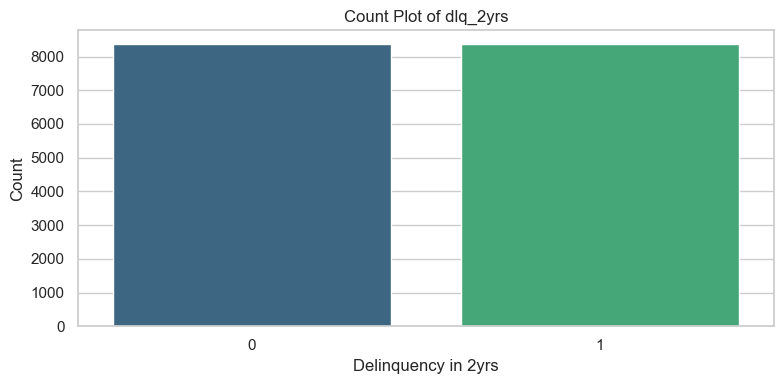

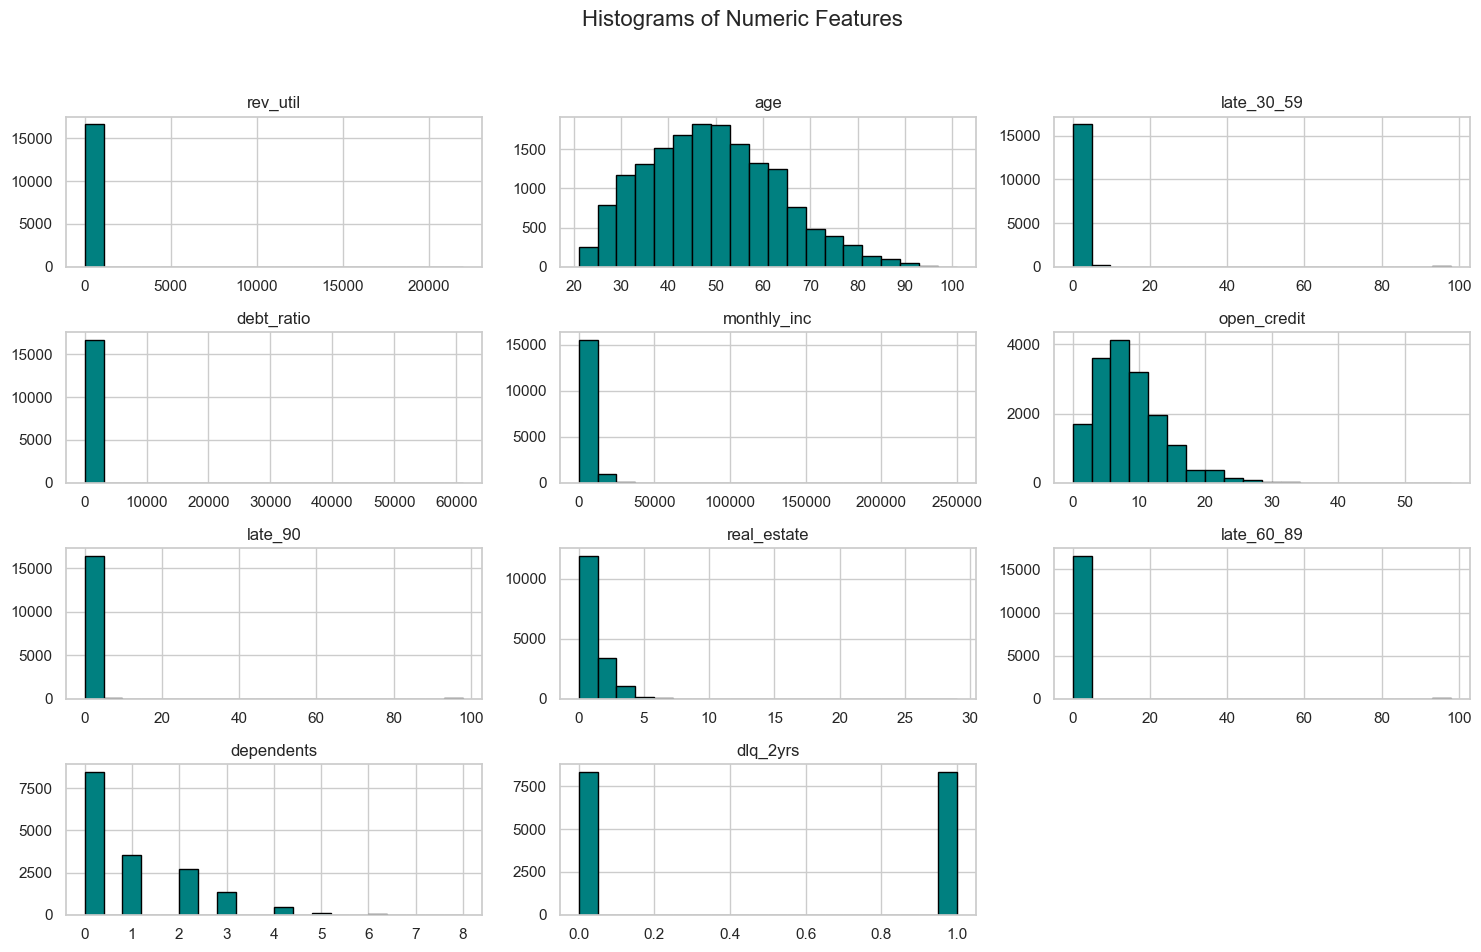

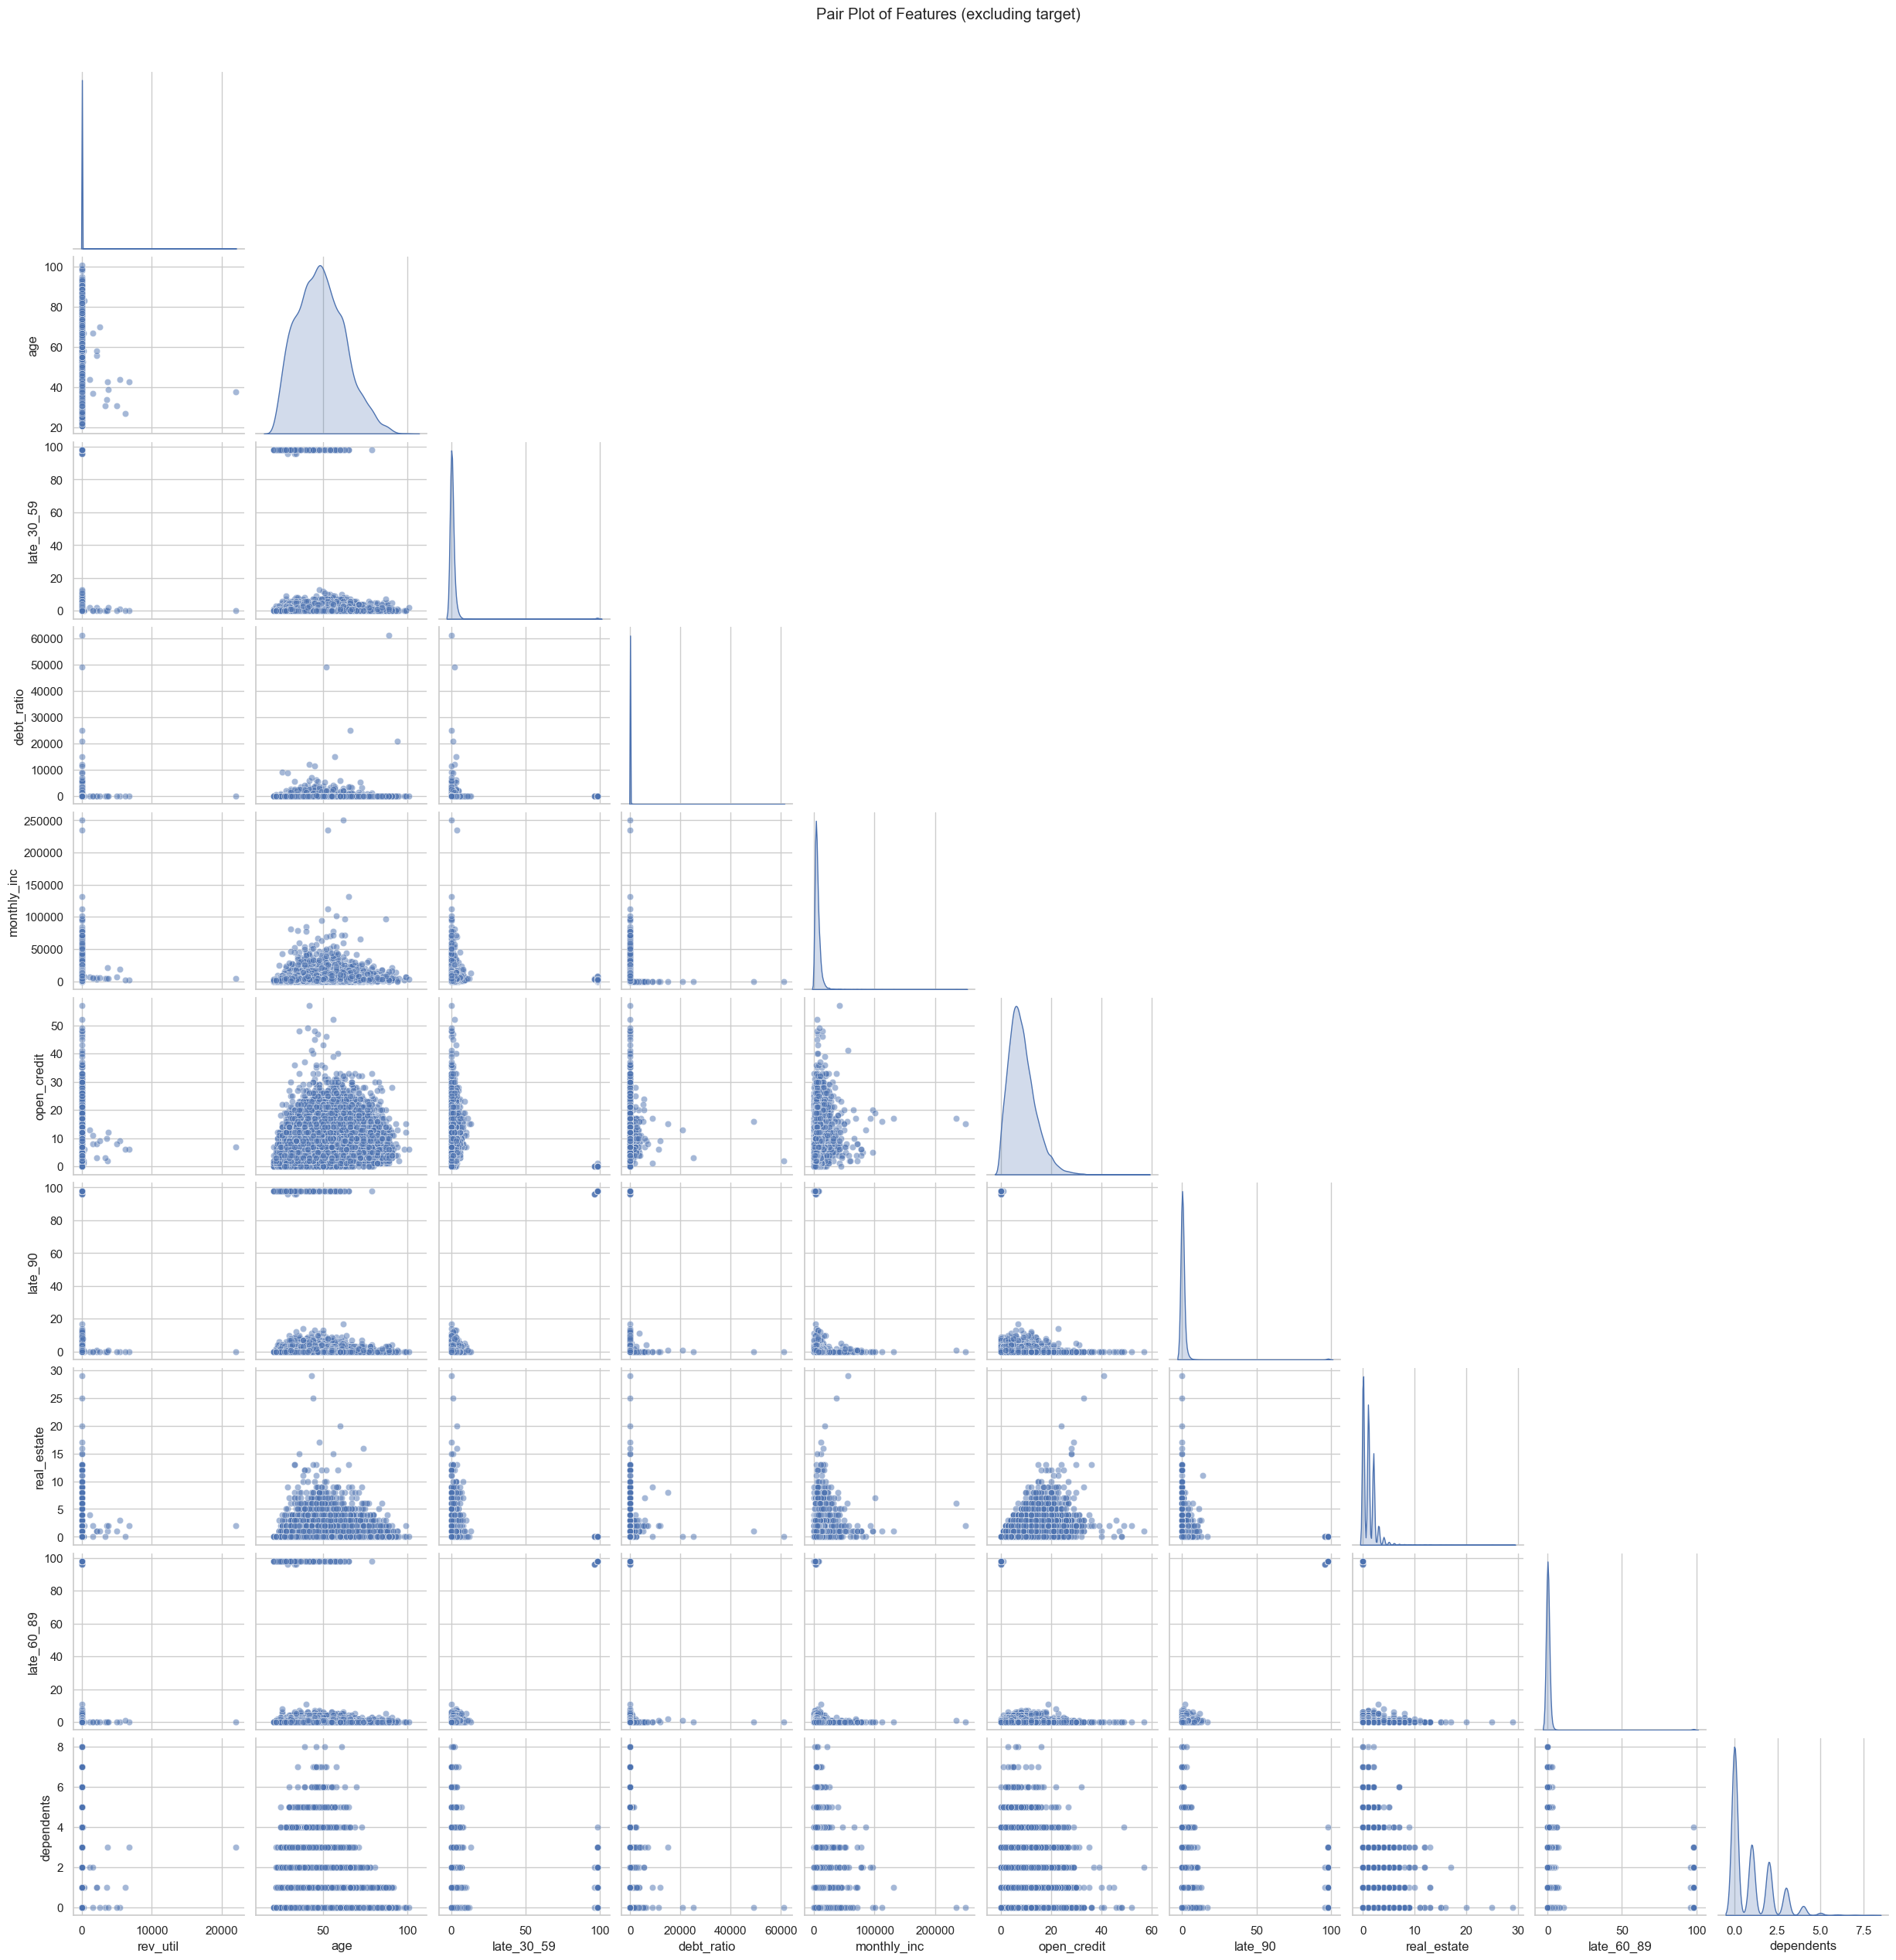

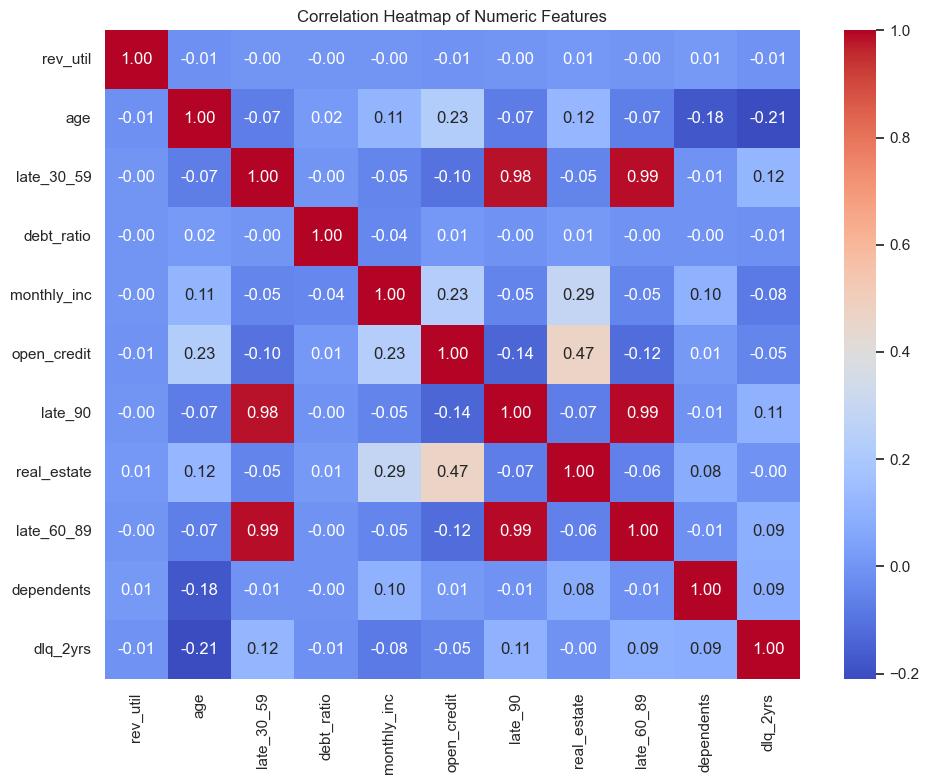

In [6]:
# Exploratory Data Analysis (EDA)

## Distribution of target variable (`dlq_2yrs`)
plt.figure(figsize=(8, 4))
sns.countplot(x='dlq_2yrs', data=df_clean, palette='viridis')
plt.title('Count Plot of dlq_2yrs')
plt.xlabel('Delinquency in 2yrs')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Histograms of all numeric columns
df_clean.hist(bins=20, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Pair Plot to inspect relationships between features
sns.pairplot(df_clean, diag_kind='kde', corner=True, plot_kws={'alpha':0.5}, 
             vars=df_clean.columns.drop('dlq_2yrs'))
plt.suptitle('Pair Plot of Features (excluding target)', y=1.02)
plt.show()

## Correlation Heatmap
# For correlation, we focus only on numeric features
numeric_df = df_clean.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

Accuracy of the Logistic Regression model: 0.7286868082560575


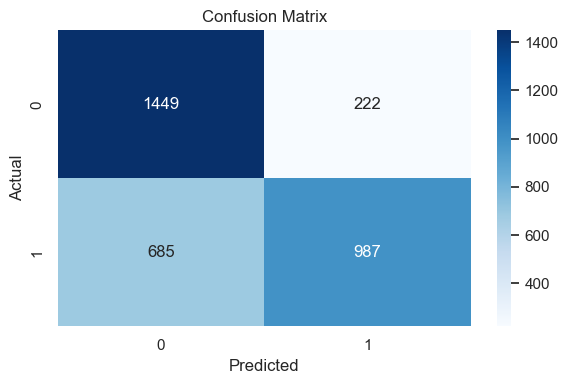

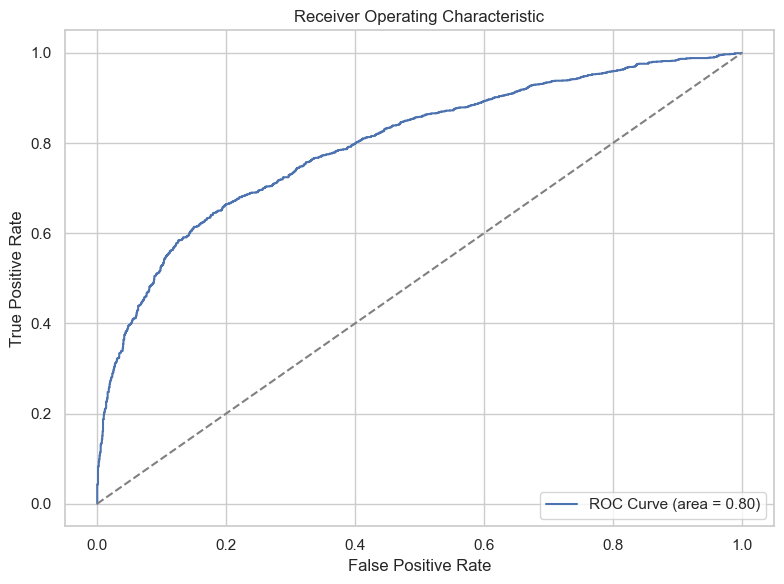


Permutation Importance:


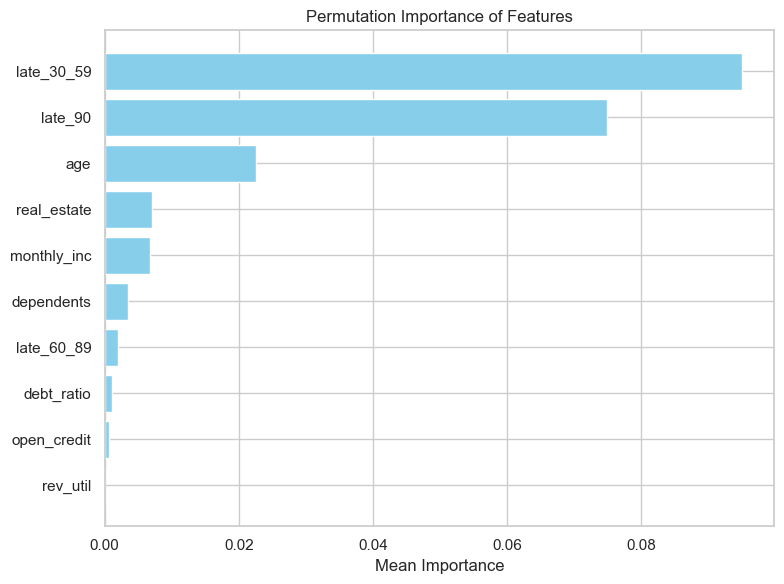

In [7]:
# Predictive Modeling
# We will attempt to predict the target variable 'dlq_2yrs' using the remaining features.

# Define features and target
X = df_clean.drop('dlq_2yrs', axis=1)
y = df_clean['dlq_2yrs']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a logistic regression model
# Note: Logistic Regression is chosen because the target appears to be binary (or categorical) in nature.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression model:', acc)

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Permutation Importance
print('\nPermutation Importance:')
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()